Data already loaded


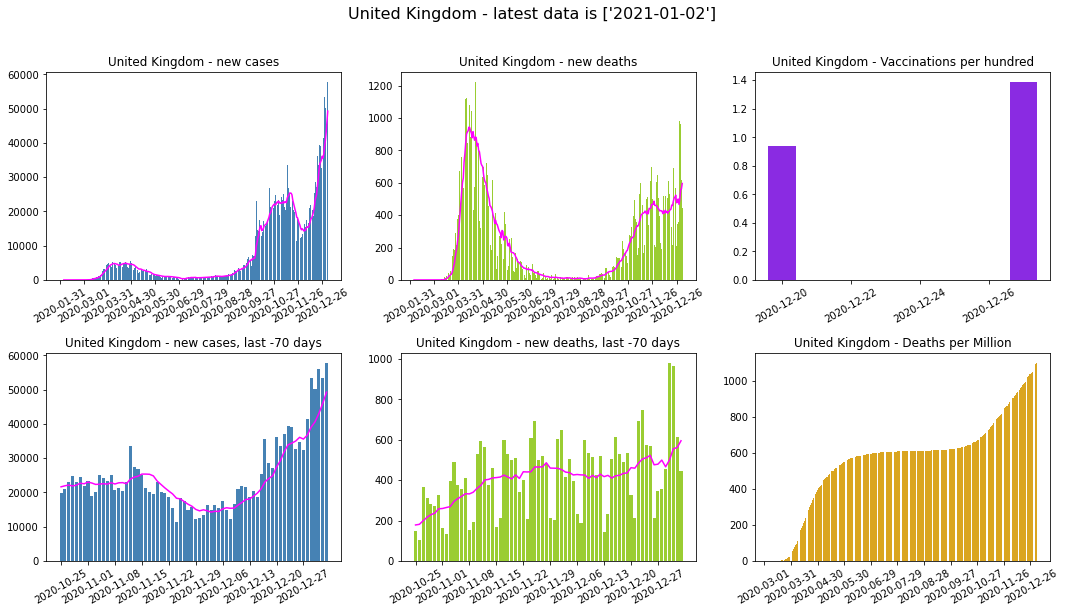

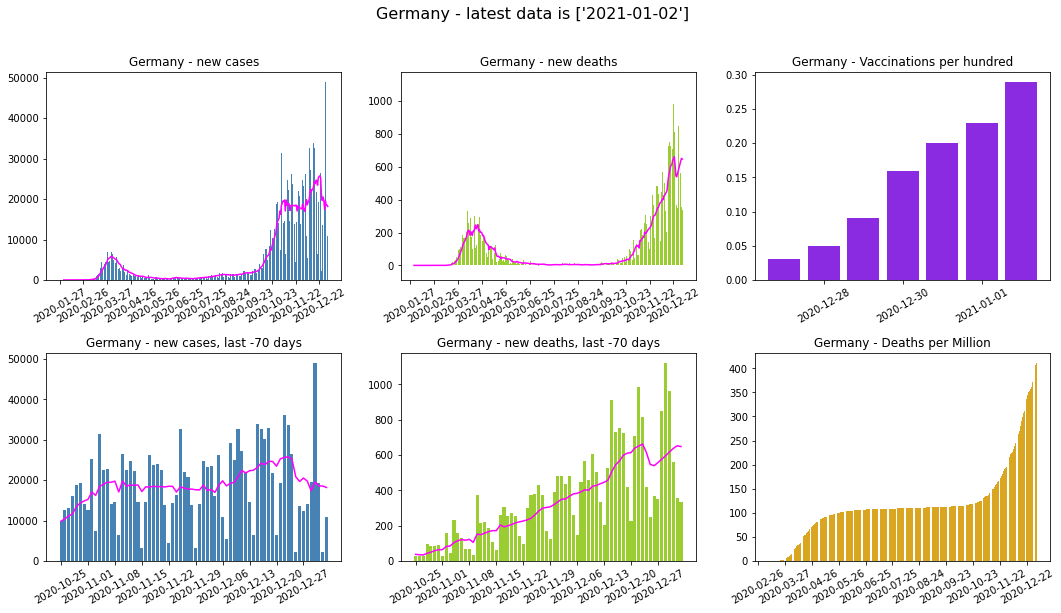

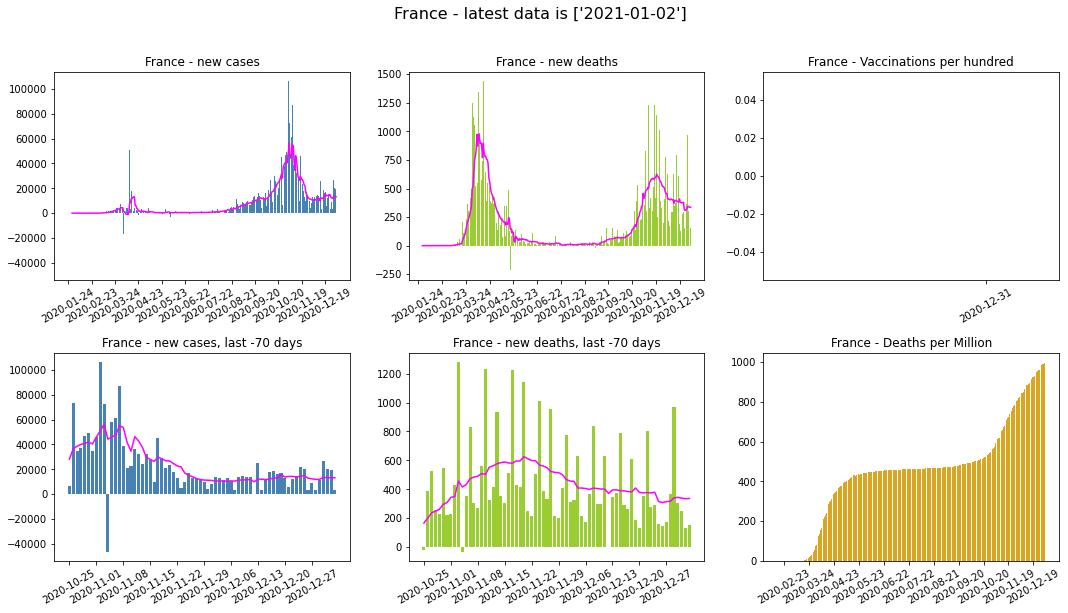

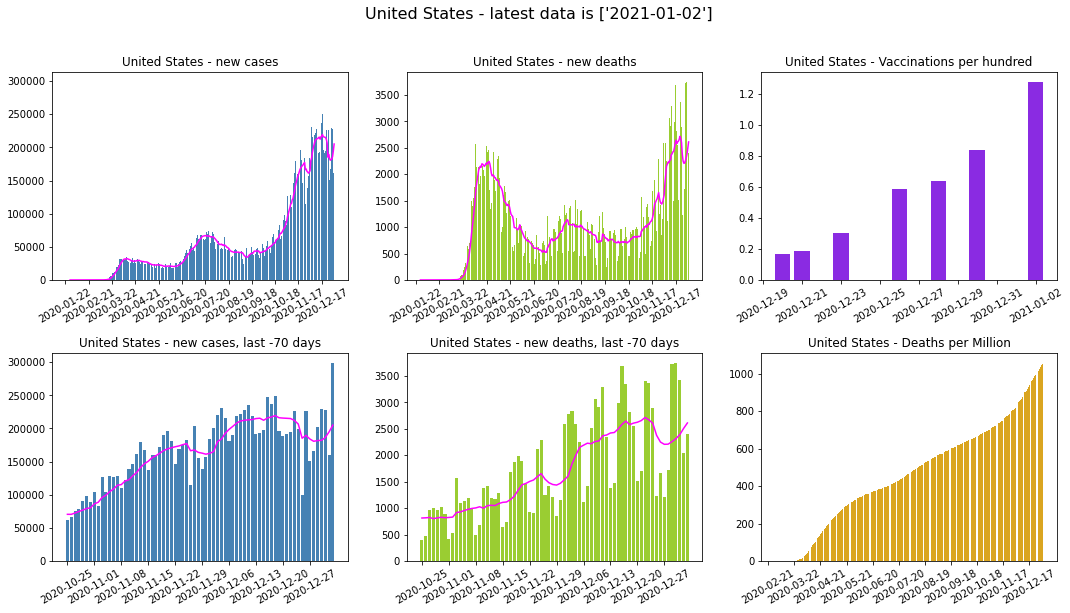

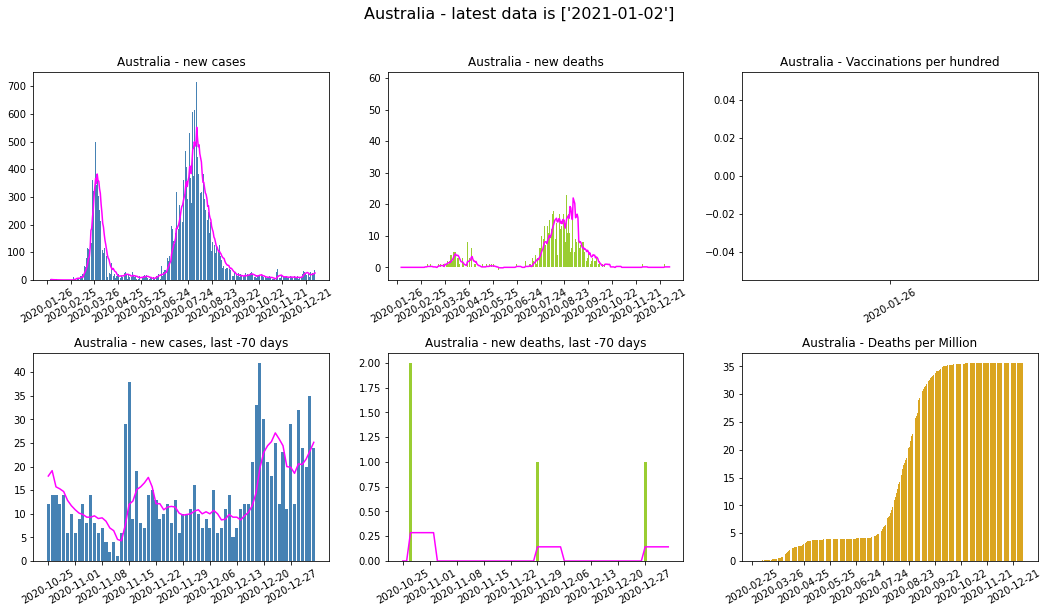

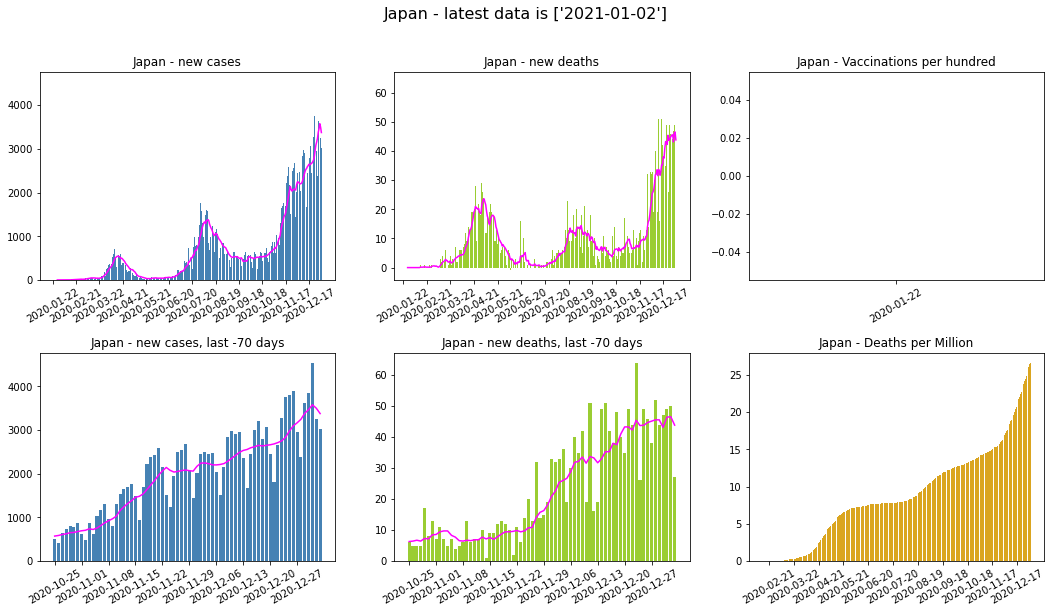

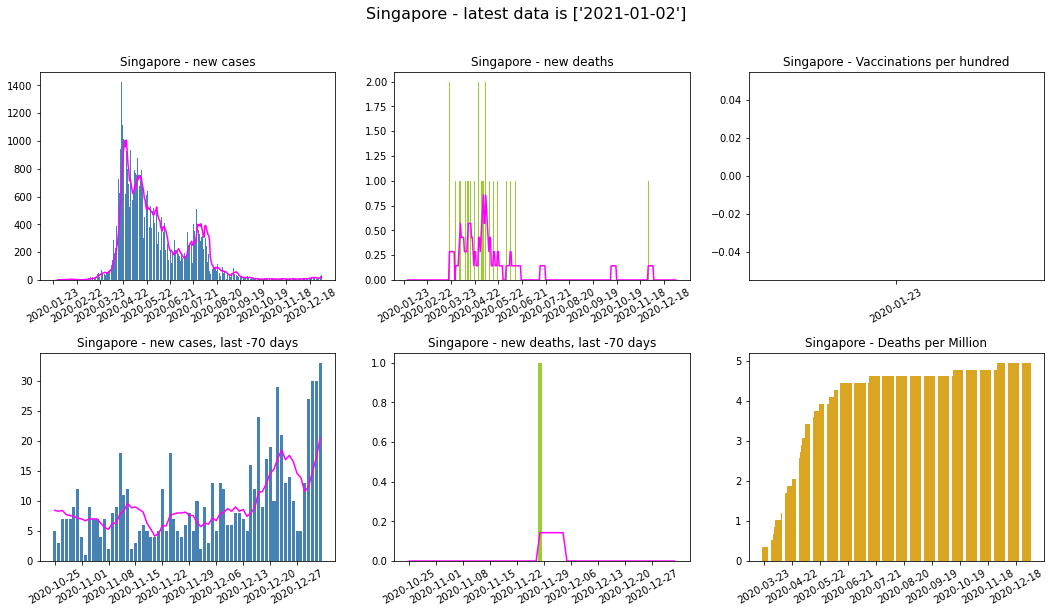

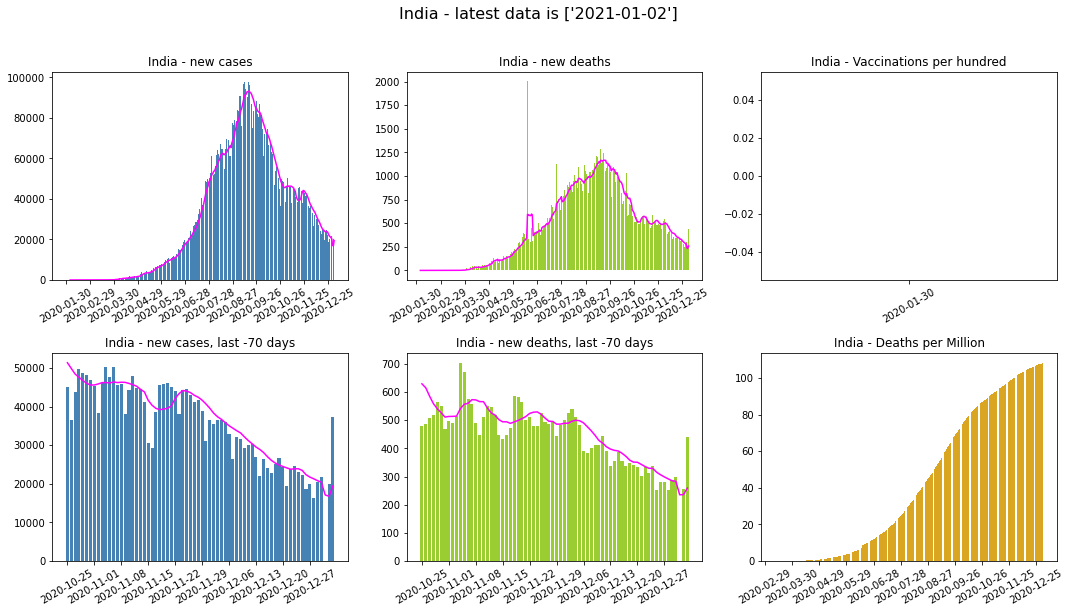

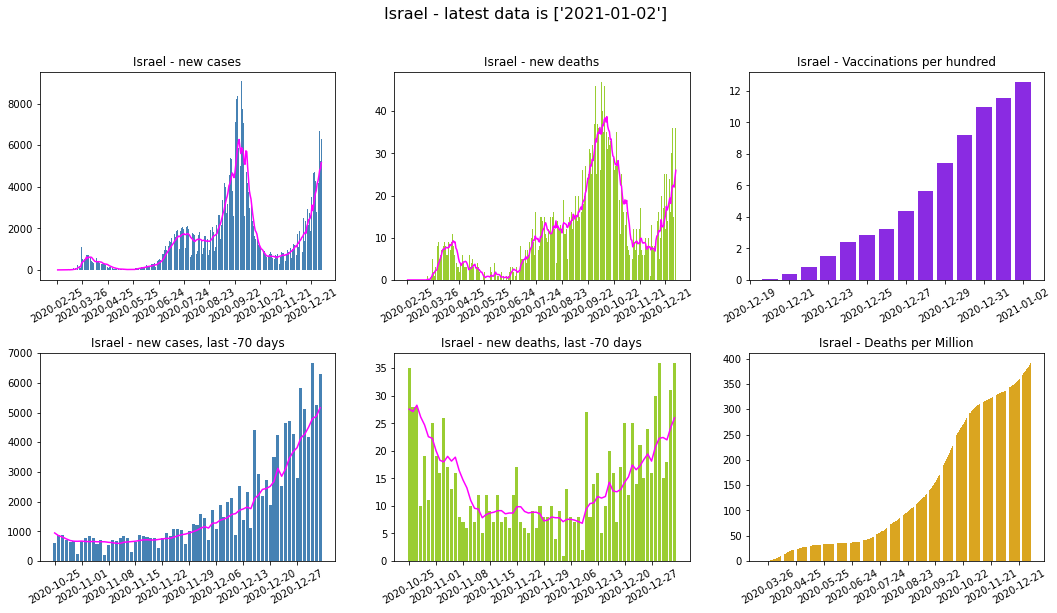

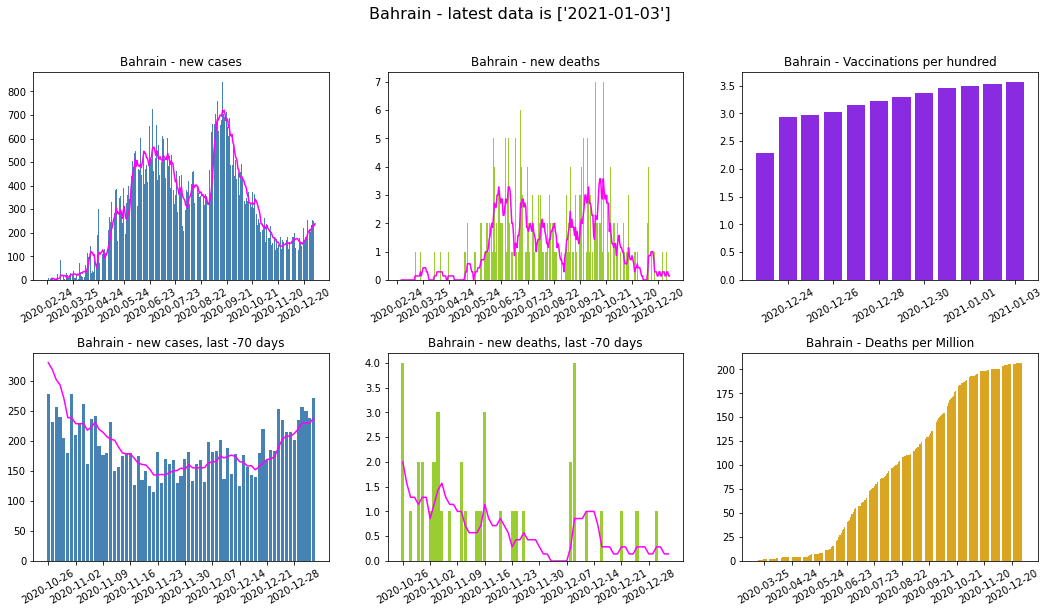

In [128]:
# Data from https://covid.ourworldindata.org/data/owid-covid-data.csv

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

ageData = dt.timedelta(hours=1, minutes=0)    # this sets up how old the data can be before we load it again.
try:
    if dataStamp + ageData < dt.datetime.today():
        load = True
        print('Data will be reloaded')
    else:
        load = False
        print('Data already loaded')
except:
    load = True

# Load the data
if load:
    print('Loading data')
    df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')
    dataStamp = dt.datetime.today()

df.sort_values(by = 'date', inplace=True)    # Make sure it is in date order.

xrot = 30    # this just shifts the date labels so they can be read

# list the iso country codes that we want to report on
for country in ['GBR', 'DEU', 'FRA', 'USA', 'AUS', 'JPN', 'SGP', 'IND', 'ISR', 'BHR']:
    df1 = df[df.iso_code == country]    # subset the data
    for name in df[df.iso_code == country]['location'][0:1]:
        pass     # just pass the name back
    x = []    # setup an empty array for the X values
    for date in df1.date.tolist():    # pop each date into the x-axis
        x.append(date)
    
    plt.rcParams["figure.figsize"] = (18,9)    # Create the Plot size
    fig , ax = plt.subplots(2,3)    # Create the plot space
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.35) # add horizontal spacing
    fig.suptitle(f"{name} - latest data is {x[-1:]}", fontsize=16)    # title the figure
    
    ticks = []    # empty array of tick positions
    i, step = 0, 30    # we use i as the tick position and step as how many to skip so we space the labels out
    for tick in x[::step]:    # loop through and slice each step
        ticks.append(i)    # add the position number to the array
        i += step    # increment the tick position
    y1 = df1.new_cases    # set the y axis values
    y2 = df1.new_cases_smoothed
    y3 = df1.new_deaths
    y4 = df1.new_deaths_smoothed
    y5 = df1.total_vaccinations_per_hundred
    y6 = df1.total_deaths_per_million
    
    plt.subplot(231)    # top left
    plt.title(f"{name} - new cases")
    plt.xticks(ticks, x[::step], rotation=xrot)
    plt.bar(x, y1, color='steelblue')
    plt.plot(x, y2, color='magenta')

    plt.subplot(232)    # top centre
    plt.title(f"{name} - new deaths")
    plt.xticks(ticks, x[::step], rotation=xrot)
    plt.bar(x, y3, color='yellowgreen')
    plt.plot(x, y4, color='magenta')

    plt.subplot(236)    # bottom right
    plt.title(f"{name} - Deaths per Million")
    plt.xticks(ticks, x[::step], rotation=xrot)
    plt.bar(x, y6, color='goldenrod')

    
    ticks = []    # empty array of tick positions
    i, step = 0, 2    # we use i as the tick position and step as how many to skip so we space the labels out
    for tick in x[::step]:    # loop through and slice each step
        ticks.append(i)    # add the position number to the array
        i += step    # increment the tick position

    plt.subplot(233)    # top right
    plt.title(f"{name} - Vaccinations per hundred")
    plt.xticks(ticks, x[::step], rotation=xrot)
    plt.xticks(rotation=xrot)
    plt.bar(x, y5, color='blueviolet')

    ### This section just slices the same date but only the last 35 values
    recent = -70    # this sets the look back value
    i, step = 0, 7
    ticks = []
    for tick in x[recent::step]:
        ticks.append(i)
        i += step

    plt.subplot(234)    # bottom left
    plt.title(f"{name} - new cases, last {recent} days")
    plt.xticks(ticks, x[recent::step], rotation=xrot)
    plt.bar(x[recent:], y1[recent:], color='steelblue')
    plt.plot(x[recent:], y2[recent:], color='magenta')

    plt.subplot(235)    # bottom centre
    plt.title(f"{name} - new deaths, last {recent} days")
    plt.xticks(ticks, x[recent::step], rotation=xrot)
    plt.bar(x[recent:], y3[recent:], color='yellowgreen')
    plt.plot(x[recent:], y4[recent:], color='magenta')


In [74]:
x[-35::3]

54640    2020-11-29
54643    2020-12-02
54646    2020-12-05
54649    2020-12-08
54652    2020-12-11
54655    2020-12-14
54658    2020-12-17
54661    2020-12-20
54664    2020-12-23
54667    2020-12-26
54670    2020-12-29
54673    2021-01-01
Name: date, dtype: object

In [69]:
df1.date[-35::].tolist()

['2020-11-29',
 '2020-11-30',
 '2020-12-01',
 '2020-12-02',
 '2020-12-03',
 '2020-12-04',
 '2020-12-05',
 '2020-12-06',
 '2020-12-07',
 '2020-12-08',
 '2020-12-09',
 '2020-12-10',
 '2020-12-11',
 '2020-12-12',
 '2020-12-13',
 '2020-12-14',
 '2020-12-15',
 '2020-12-16',
 '2020-12-17',
 '2020-12-18',
 '2020-12-19',
 '2020-12-20',
 '2020-12-21',
 '2020-12-22',
 '2020-12-23',
 '2020-12-24',
 '2020-12-25',
 '2020-12-26',
 '2020-12-27',
 '2020-12-28',
 '2020-12-29',
 '2020-12-30',
 '2020-12-31',
 '2021-01-01',
 '2021-01-02']

In [44]:
df1

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
54337,GBR,Europe,United Kingdom,2020-01-31,2.0,2.0,NaN,NaN,NaN,NaN,...,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
54338,GBR,Europe,United Kingdom,2020-02-01,2.0,0.0,NaN,NaN,NaN,NaN,...,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
54339,GBR,Europe,United Kingdom,2020-02-02,2.0,0.0,NaN,NaN,NaN,NaN,...,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
54340,GBR,Europe,United Kingdom,2020-02-03,8.0,6.0,NaN,NaN,NaN,NaN,...,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
54341,GBR,Europe,United Kingdom,2020-02-04,8.0,0.0,NaN,NaN,NaN,NaN,...,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54670,GBR,Europe,United Kingdom,2020-12-29,2389963.0,53275.0,39050.571,71675.0,458.0,466.571,...,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
54671,GBR,Europe,United Kingdom,2020-12-30,2440202.0,50239.0,40600.857,72657.0,982.0,500.000,...,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
54672,GBR,Europe,United Kingdom,2020-12-31,2496231.0,56029.0,43012.429,73622.0,965.0,555.714,...,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
54673,GBR,Europe,United Kingdom,2021-01-01,2549689.0,53458.0,45963.143,74237.0,615.0,562.143,...,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922


In [87]:
ticks

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34]